# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

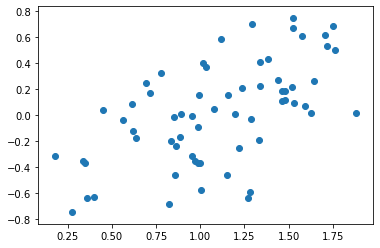

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

n = 64
x = np.linspace(0,1,n) + np.random.rand(4, n)
x = np.vstack([x,np.ones(len(x.T))]).T  # np.ones appends ones to x vector to match dimensions of beta vector
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

plt.scatter(x.T[0], y)


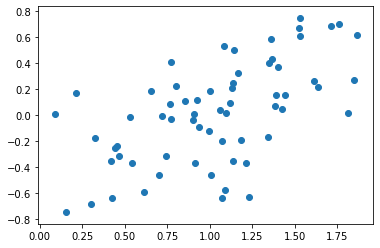

In [3]:
plt.scatter(x.T[1], y)


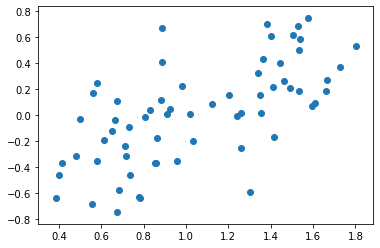

In [4]:
plt.scatter(x.T[2], y)

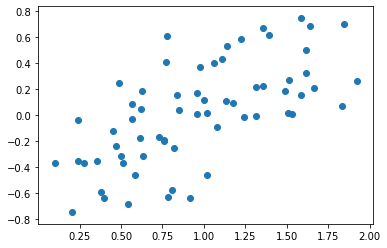

In [5]:
plt.scatter(x.T[3], y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [6]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
np.dot(left, right)


array([ 0.09371505,  0.19332356,  0.26693604,  0.24053644, -0.79644168])

In [7]:
beta = np.linalg.lstsq(x, y, rcond=None)[0]
beta


array([ 0.09371505,  0.19332356,  0.26693604,  0.24053644, -0.79644168])

In [8]:
pred = np.dot(x, beta)
pred

array([-0.33372921, -0.5115895 , -0.22211145, -0.44423001, -0.38168586,
       -0.38771755, -0.26358186, -0.27364443, -0.48333021, -0.33480199,
       -0.11465669, -0.11251797, -0.17253084, -0.30827013, -0.32407728,
       -0.30515046, -0.05438669, -0.10040623, -0.03961792, -0.23984734,
       -0.29576907, -0.1251385 , -0.12358649, -0.11874488, -0.27289486,
       -0.23342002, -0.06314296, -0.25752641,  0.07186393, -0.09599045,
       -0.02500621,  0.22822204,  0.14223544, -0.15464615,  0.02806706,
       -0.04027699,  0.09917471, -0.09931395,  0.07951794,  0.27896504,
       -0.06822851,  0.27521917,  0.35420009,  0.19859136,  0.20766734,
        0.24878522,  0.33665608,  0.20325234,  0.50041168,  0.26607341,
        0.2769496 ,  0.44472408,  0.32975017,  0.38849238,  0.28815817,
       -0.00334356,  0.13188522,  0.46003462,  0.31482162,  0.5212575 ,
        0.50328331,  0.47671305,  0.33587108,  0.4884197 ])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

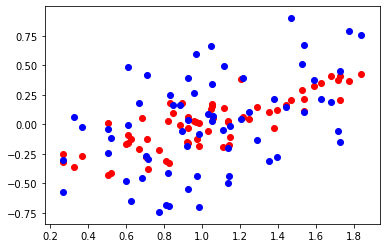

In [8]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

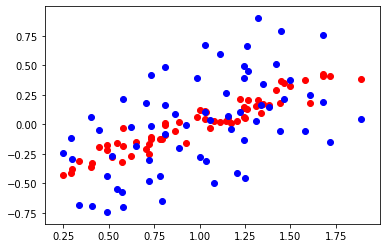

In [9]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [10]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [11]:
# Model where X = Income, Limit and Y = rating
X = credit[['Income', 'Limit']].as_matrix()
X = np.vstack([X.T, np.ones(len(X))]).T
Y = credit['Rating']
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[1.48910e+01, 3.60600e+03, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 1.00000e+00]])

In [12]:
# Model where X = Income, Limit and Y = rating
Beta = np.linalg.lstsq(X, Y, rcond=None)[0]
Pred = np.dot(X, Beta)

In [13]:
# Model where X = Balance, Cards and Y = rating
X1 = credit[['Balance', 'Cards']].as_matrix()
X1 = np.vstack([X1.T, np.ones(len(X1))]).T
X1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[333.,   2.,   1.],
       [903.,   3.,   1.],
       [580.,   4.,   1.],
       ...,
       [138.,   5.,   1.],
       [  0.,   1.,   1.],
       [966.,   5.,   1.]])

In [14]:
# Model where X = Balance, Cards and Y = rating
Beta1 = np.linalg.lstsq(X1, Y, rcond=None)[0]
Pred1 = np.dot(X1, Beta1)

In [15]:
# Model where X = Age, Education and Y = Rating
X2 = credit[['Age', 'Education']].as_matrix()
X2 = np.vstack([X2.T, np.ones(len(X2))]).T
X2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[34., 11.,  1.],
       [82., 15.,  1.],
       [71., 11.,  1.],
       ...,
       [67., 12.,  1.],
       [44., 13.,  1.],
       [64.,  7.,  1.]])

In [16]:
# Model where X = Age, Education and Y = Rating
Beta2 = np.linalg.lstsq(X2, Y, rcond=None)[0]
Pred2 = np.dot(X2, Beta2)

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

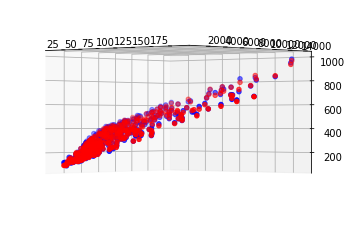

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model where X = Income, Limit and Y = Rating
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(-0.5, -49)
ax.scatter(X.T[0], X.T[1], Pred, zdir='z', c='r')
ax.scatter(X.T[0], X.T[1], Y, zdir='z', c='b')

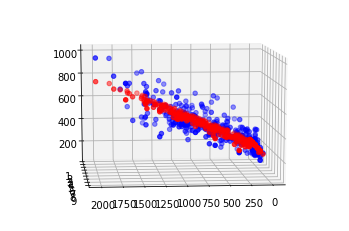

In [18]:
# Model where X = Balance, Cards and Y = Rating
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 85)
ax.scatter(X1.T[0], X1.T[1], Pred1, zdir='z', c='r')
ax.scatter(X1.T[0], X1.T[1], Y, zdir='z', c='b')

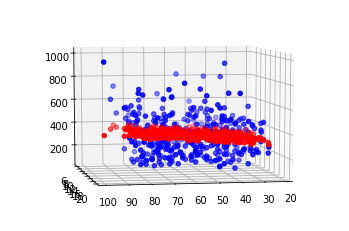

In [19]:
# Model where X = Age, Education and Y = Rating
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, 80)
ax.scatter(X2.T[0], X2.T[1], Pred2, zdir='z', c='r')
ax.scatter(X2.T[0], X2.T[1], Y, zdir='z', c='b')